# Part 1: Logistic Regression

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm

In [2]:
class LogisticRegression:
    
    
    def __init__(self, learningRate, tolerance, maxIteration = 1000, remove_indices = None):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.remove_indices = remove_indices
        
        
    def datasetReader(self):    
        train_df = pd.read_excel('./datasets/Lab3_data.xls', sheet_name = '2004--2005 Data')
        test_df = pd.read_excel('./datasets/Lab3_data.xls', sheet_name = '2004--2007 Data')
        
        train_df, test_df = np.array(train_df, dtype = np.float64), np.array(test_df, dtype = np.float64)
        
        print("Before Removing Indices: ", train_df.shape)
        
        # Function to remove bad points
        if self.remove_indices:
            for i in range(len(self.remove_indices)):
                train_df = self.remove_index(train_df, self.remove_indices[i])
                
                if i < len(self.remove_indices) - 1:
                    self.remove_indices = [k - 1 for k in self.remove_indices]
                    
                
        print("After Removing Indices: ", train_df.shape)
        
        
        X_train, y_train = train_df[:, 1:], train_df[:, 0]
        X_test, y_test = test_df[:, 1:], test_df[:, 0]
        
        return X_train, X_test, y_train, y_test
    
    
    def addX0(self, X):
        return np.column_stack([np.ones(X.shape[0], 1), X])
    
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def costFunction(self, X, y):
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) # Neg Log Likelihood
        cost = pred_.sum()
        
        return cost
    
    
    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        
        return grad
        
        
    def gradientDescent(self, X, y):
        cost_sequences = []
        
        last_cost = float('inf')
        
        for i in tqdm.tqdm(range(self.maxIteration)):
        
            self.w = self.w - self.learningRate * self.gradient(X, y)
            
            cur_cost = self.costFunction(X, y)
            diff = last_cost - cur_cost
            
            last_cost = cur_cost
            
            cost_sequences.append(cur_cost)
            
            if diff < self.tolerance:
                print("The model stopped - Converged")
                break
                
            
        self.plot()
        
        return 
    
    
    def predict(self, X):
        
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return accuracy, precision, recall
    
    
    def runModel(self):
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.datasetReader()

        
        print("Solving using gradient descent")
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        
        print(self.w)
        
        y_hat_train = self.predict(self.X_train)
        
        accuracy, precision, recall = self.evaluate(self.y_train, y_hat_train)
        
        print("Evaluation for training data: \n")
        print("Accuracy: ", accuracy)
        print("Precision: ", precision)
        print("Recall: ", recall)
        
        
    def remove_index(self, X, index):
        
        X = np.delete(X, (index), axis = 0)
        
        return X
        
    def plotCost(self, error_sequences):
        s = np.array(error_sequences)
        t = np.arange(s.size)
        
        fix, ax = plt.subplots()
        ax.plot(t, s)
        
        ax.set(xlabel = 'Number of iterations',
               ylabel = 'Error Value'
              )
        
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        
        annotate_txt = [str(i) for i in range(1, self.X_train.shape[0])]
        
        
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)
        
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)
        

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

        
        

Let's create a new model and train it on all the data points

In [3]:
lr = LogisticRegression(tolerance=1e-4, learningRate = 0.1e-5, maxIteration=1000000)

  1%|          | 5596/1000000 [00:00<00:17, 55950.45it/s]

Before Removing Indices:  (46, 3)
After Removing Indices:  (46, 3)
Solving using gradient descent


 42%|████▏     | 422942/1000000 [00:06<00:09, 61354.50it/s]


The model stopped - Converged
[-0.58236756  0.28178346]
Evaluation for training data: 

Accuracy:  0.9565217391304348
Precision:  0.9722222222222222
Recall:  0.9722222222222222


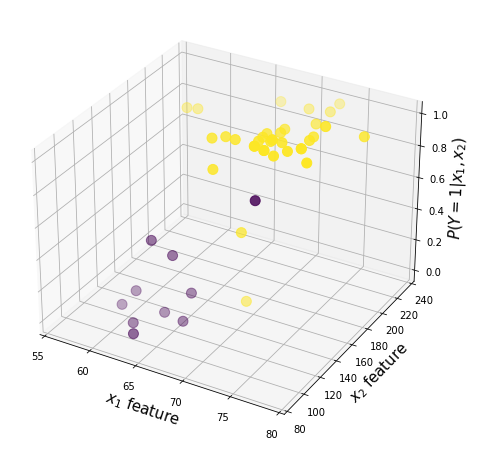

In [4]:
lr.runModel()

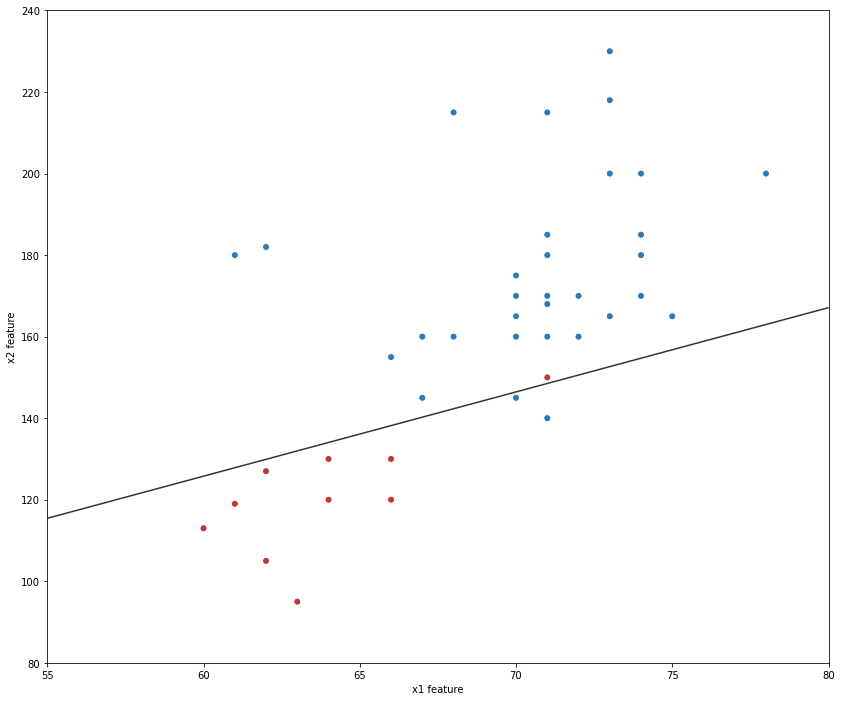

In [5]:
lr.scatterPlt()

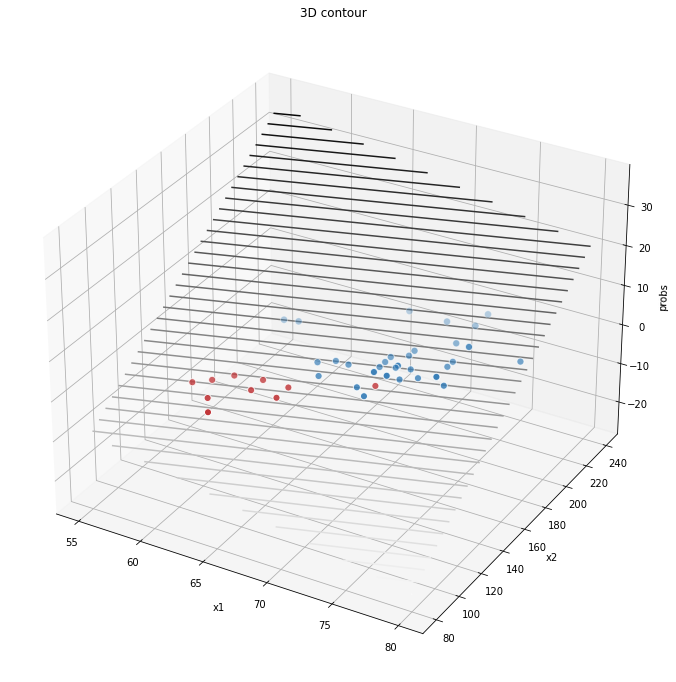

In [6]:
lr.plot3D()

Now let's train another model by removing data points 1 and 39.

In [7]:
lr2 = LogisticRegression(tolerance=1e-4, learningRate = 0.1e-5, maxIteration=1000000, remove_indices = [0, 38])

  1%|          | 5947/1000000 [00:00<00:16, 59465.95it/s]

Before Removing Indices:  (46, 3)
After Removing Indices:  (44, 3)
Solving using gradient descent


100%|██████████| 1000000/1000000 [00:16<00:00, 61443.48it/s]


[-1.38545786  0.67035384]
Evaluation for training data: 

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


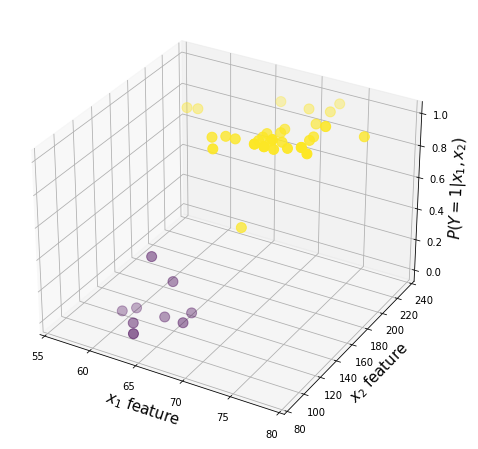

In [11]:
lr2.runModel()

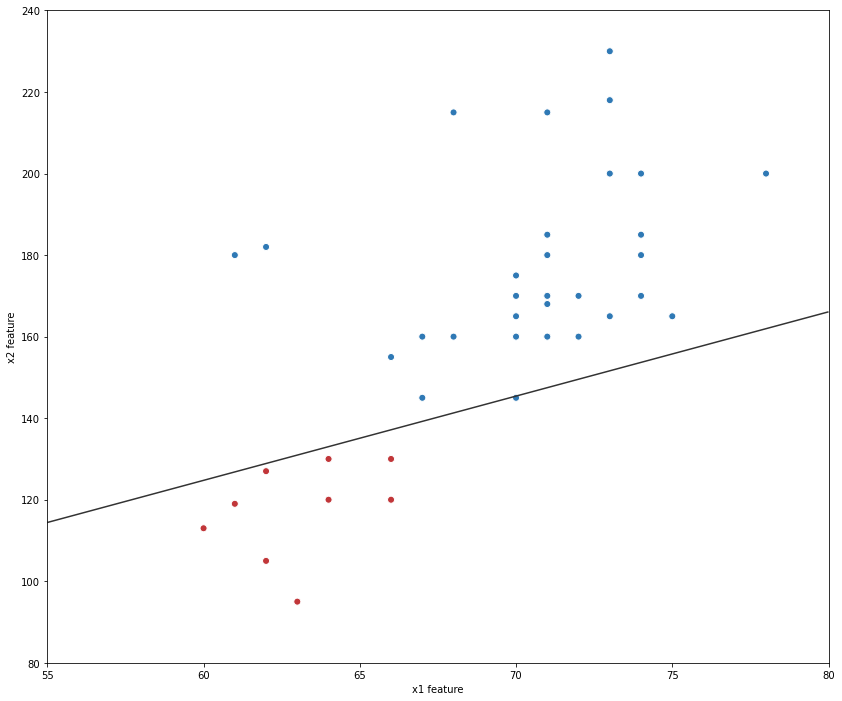

In [12]:
lr2.scatterPlt()

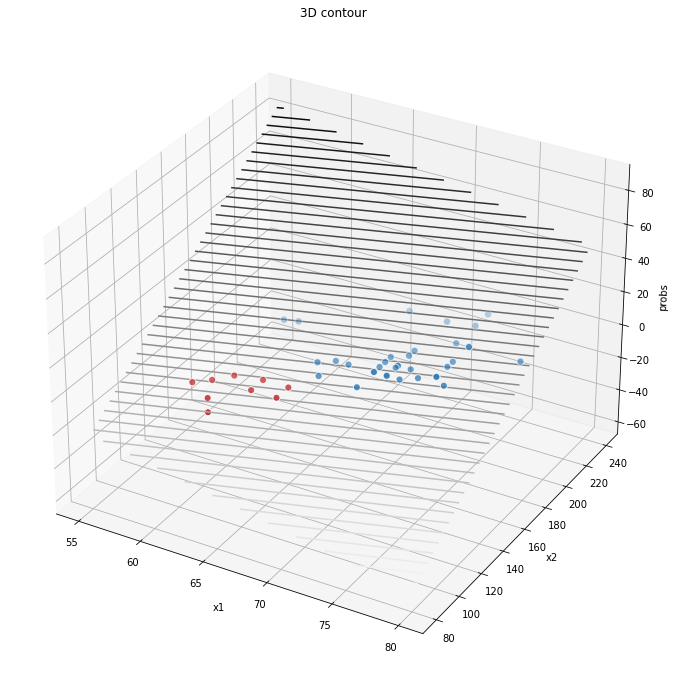

In [13]:
lr2.plot3D()

As we can see, removing those two points boosted the model accuracy to a perfect 1. This is happening because data point 1 and 39 are outliers. One of them is a class 0 point situated close to class 1 points. And the other is a class 1 point situated close to class 0 points. The decision boundary is such that both of these points are on the wrong side. Because of this there cannot be a decision boundary which perfectly separates both the classes. 

However, on removing those two outliers we can come up with a decision boundary that perfectly separate the two classes as we can see from Model 2's plot

# Part 2: Naive Bayes

In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize

from scipy.stats import norm

from random import choices

In [15]:
X, y = make_blobs(n_samples=10000, centers=2, n_features = 2, random_state = 1)

In [16]:
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(10000, 2) (10000,)
[[-3.08389358  5.70067218]
 [-8.80258525 -5.07389013]
 [-1.68452735  5.22511143]
 [-1.44683075  4.51471432]
 [-3.36067232  3.22371079]]
[0 1 0 0 0]


In [17]:
class NaiveBayes:
    
    def __init__(self, X, y, epsilon = 1, L = 2, discrete = False):
        self.X = X
        self.y = y
        self.epsilon = epsilon
        self.discrete = discrete
        self.L = L
        
        
    def trainTestSplit(self):
        self.X_train, self.X_test, self.y_train, self.y_test =  train_test_split(self.X, self.y, 
                                                                                 test_size = 0.3, random_state = 1)
        
        
    def fitDistribution(self, data):
        mu = np.mean(data)
        sigma = np.std(data)
        
        dist = norm(mu, sigma)
        return dist
    
    
    def probability(self, x, prior, label):
        
        if not self.discrete:
            dist1 = self.dist_X0y0 if label == 0 else self.dist_X0y1
            dist2 = self.dist_X1y0 if label == 0 else self.dist_X1y1
            
            return prior * dist1.pdf(x[0]) * dist2.pdf(x[1])
          
        else:
            ans = prior

            if label == 0:
                if x[0] == 0:
                    ans *= self.prob_X00y0
                elif x[0] == 1:
                    ans *= self.prob_X01y0

                if x[1] == 0:
                    ans *= self.prob_X10y0
                elif x[1] == 1:
                    ans *= self.prob_X11y0

            elif label == 1:
                if x[0] == 0:
                    ans *= self.prob_X00y1
                elif x[0] == 1:
                    ans *= self.prob_X01y1

                if x[1] == 0:
                    ans *= self.prob_X10y1
                elif x[1] == 1:
                    ans *= self.prob_X11y1

            return ans
                
    
    def runModel(self):
        self.trainTestSplit()
        
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
        
        # Calculate Priors
        self.prior_y0 = len(self.X0_train) / len(self.X_train)
        self.prior_y1 = len(self.X1_train) / len(self.X_train)
        
        
        if self.discrete:
            # X0 = 0, Y = 0
            self.prob_X00y0 = (self.X0_train[np.where(self.X0_train[:,0] == 0)].shape[0] + self.epsilon)/(len(self.X0_train) + self.L*self.epsilon)
            # X0 = 1, Y = 0
            self.prob_X01y0 = (self.X0_train[np.where(self.X0_train[:,0] == 1)].shape[0] + self.epsilon)/(len(self.X0_train) + self.L*self.epsilon)

            # X1 = 0, Y = 0
            self.prob_X10y0 = (self.X0_train[np.where(self.X0_train[:,1] == 0)].shape[0] + self.epsilon)/(len(self.X0_train) + self.L*self.epsilon)
            # X1 = 1, Y = 0
            self.prob_X11y0 = (self.X0_train[np.where(self.X0_train[:,1] == 1)].shape[0] + self.epsilon)/(len(self.X0_train) + self.L*self.epsilon)


            # X0 = 0, Y = 1
            self.prob_X00y1 = (self.X1_train[np.where(self.X1_train[:,0] == 0)].shape[0] + self.epsilon)/ (len(self.X1_train) + self.L*self.epsilon)
            # X0 = 1, Y = 1
            self.prob_X01y1 = (self.X1_train[np.where(self.X1_train[:,0] == 1)].shape[0] + self.epsilon)/ (len(self.X1_train) + self.L*self.epsilon)

            # X1 = 0, Y = 1
            self.prob_X10y1 = (self.X1_train[np.where(self.X1_train[:,1] == 0)].shape[0] + self.epsilon)/ (len(self.X1_train) + self.L*self.epsilon)

            # X1 = 1, Y = 1
            self.prob_X11y1 = (self.X1_train[np.where(self.X1_train[:,1] == 1)].shape[0] + self.epsilon)/ (len(self.X1_train) + self.L*self.epsilon)
        
        else:
        
            # Create PDFs for class 0
            self.dist_X0y0 = self.fitDistribution(self.X0_train[:, 0])
            self.dist_X1y0 = self.fitDistribution(self.X0_train[:, 1])

            # Create PDFs for class 1
            self.dist_X0y1 = self.fitDistribution(self.X1_train[:, 0])
            self.dist_X1y1 = self.fitDistribution(self.X1_train[:, 1])
        
        
    
    def predict(self):
        
        for sample, target in zip(self.X_test, self.y_test):
            py0 = self.probability(sample, self.prior_y0, label = 0)
            py1 = self.probability(sample, self.prior_y1, label = 1)
            
            print('P(y=0| %s) = %.3f' % (sample, py0*100))
            print('P(y=1| %s) = %.3f' % (sample, py1*100))
            
                
            print("Model predicted class {} and the truth was {} \n".format(np.argmax([py0*100, py1*100]), target))



In the above class, we have added three extra parameters: 
1. epsilon (integer): The count value used for Laplace Smoothing (equivalent to alpha or tau)
2. discrete (Boolean): A boolean flag indicating whether the data is discrete or continuous
3. L (integer): The number of labels / classes

Depending on whether the data is discrete or continuous, the model will calculate different parameters and will predict accordingly. In either case, this Naive Bayes model has a high accuracy on the test dataset

**Let's convert the dataset to discrete**

In [18]:
X = np.where(X > 0, 1, 0)

In [19]:
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(10000, 2) (10000,)
[[0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]]
[0 1 0 0 0]


As we can see our input data is now discrete, with both features being binary. Let us train a new Naive Bayes model on this discrete data and apply laplace smoothing with epsilon = 1.

In [20]:
nb = NaiveBayes(X, y, epsilon = 1, discrete = True, L = 2)

In [21]:
nb.runModel()

In [22]:
nb.predict()

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 


P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 


P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 


P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014

Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300

P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074

Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [1 1]) = 2.583
P(y=1| [1 1]) = 0.000
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014


P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 


P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [1 1]) = 2.583
P(y=1| [1 1]) = 0.000
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 




P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 1]) = 47.074
P(y=1| [0 1]) = 0.014
Model predicted class 0 and the truth was 0 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

P(y=0| [0 0]) = 0.014
P(y=1| [0 0]) = 50.300
Model predicted class 1 and the truth was 1 

We can see from the results of the predict function that our model shows 100% test accuracy on discrete data as well.